In [54]:
import csv
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as sm
f = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv',sep=';', index_col=0)
print(f.info())
for i in range(len(f.columns)):
    print(f.columns[i],':',type(f.iloc[0,i]))
print('Textual data in Python is handled with str objects, or strings. Strings are immutable sequences of Unicode code points.')

<>:8: SyntaxWarning: invalid escape sequence '\Z'
<>:8: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\3554336234.py:8: SyntaxWarning: invalid escape sequence '\Z'
  f = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv',sep=';', index_col=0)


<class 'pandas.core.frame.DataFrame'>
Index: 3204104 entries, 408097 to 2897495
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   IDNummer   object
 1   Gemeinden  object
 2   Zulassung  object
dtypes: object(3)
memory usage: 97.8+ MB
None
IDNummer : <class 'str'>
Gemeinden : <class 'str'>
Zulassung : <class 'str'>
Textual data in Python is handled with str objects, or strings. Strings are immutable sequences of Unicode code points.


In [55]:
#From the Table Zulassungen we extract the IDNummers of all cars registered in Adelshofen.
Zulassungen = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv', sep=';', index_col=0)
Adelshofen = Zulassungen[Zulassungen['Gemeinden'] == 'ADELSHOFEN'] 
#We delete the table Zulassungen and columns from Adeslhofen that we do not need, in order to free up memory.
del Zulassungen
Adelshofen = Adelshofen.loc[:,['Gemeinden', 'IDNummer']]
#We load the file Bestandteile_Fahrzeuge_OEM1_Typ11.csv and concatenate it with the other files Bestandteile_Fahrzeuge_OEM1_Typ12.csv, Bestandteile_Fahrzeuge_OEM2_Typ21.csv, Bestandteile_Fahrzeuge_OEM2_Typ22.csv.
#Thus creating a table Bestandteile that contains all the components of the all vehicles.
#Then we merge the table Bestandteile with the table Adelshofen on the column IDNummer. It turns out only a 48 out of 132 vehicles in Adelshofen are registered in the Bestandteile table.
files = ['Bestandteile_Fahrzeuge_OEM1_Typ11.csv', 'Bestandteile_Fahrzeuge_OEM1_Typ12.csv', 'Bestandteile_Fahrzeuge_OEM2_Typ21.csv', 'Bestandteile_Fahrzeuge_OEM2_Typ22.csv']
Bestandteile = pd.read_csv('Data\Fahrzeug\Bestandteile_Fahrzeuge_OEM1_Typ11.csv', sep=';', index_col=0, names=['ID_Karosserie', 'ID_Schaltung', 'ID_Sitze', 'ID_Motor', 'IDNummer'])
for i in range(len(files)-1):
    path = 'Data\Fahrzeug\\' + files[i+1]
    f = pd.read_csv(path, sep=';', index_col=0, names=['ID_Karosserie', 'ID_Schaltung', 'ID_Sitze', 'ID_Motor', 'IDNummer'])
    Bestandteile = pd.concat([Bestandteile, f], ignore_index=True, names=['ID_Karosserie', 'ID_Schaltung', 'ID_Sitze', 'ID_Motor', 'IDNummer'])
Bestandteile = pd.merge(Bestandteile, Adelshofen, on='IDNummer') 
#The component T16 only exists in the Komponentes K2ST1 and K2LE1. We drop the unnecessary columns and concatenate the two tables.
Sitze1 = pd.read_csv('Data\Komponente\Bestandteile_Komponente_K2ST2.csv', sep=';', index_col=0, names=['ID_T16', 'ID_T17', 'ID_18', 'ID_Sitze'])
Sitze2 = pd.read_csv('Data\Komponente\Bestandteile_Komponente_K2LE2.csv', sep=';', index_col=0, names=['ID_T16', 'ID_T19', 'ID_20', 'ID_Sitze'])
Sitze1 = Sitze1.loc[:, ['ID_Sitze', 'ID_T16']]
Sitze2 = Sitze2.loc[:, ['ID_Sitze', 'ID_T16']]
Sitze = pd.concat([Sitze1, Sitze2], ignore_index=True, names=['ID_Sitze', 'ID_T16'])
#We delete the two dfs Sitze1 and Sitze2 to free up memory and merge the table Bestandteile with the table Sitze on the column ID_Sitze.
del Sitze1
del Sitze2
Bestandteile = pd.merge(Bestandteile, Sitze, on='ID_Sitze')
#For every car that is registered in Adelshofen and that is registered in Bestandteile, there is one componeten T16.
print('There are:', len(Bestandteile)-Bestandteile['ID_T16'].duplicated().sum(), 'T16 Components in Adelshofen.')

<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:13: SyntaxWarning: invalid escape sequence '\F'
<>:18: SyntaxWarning: invalid escape sequence '\K'
<>:19: SyntaxWarning: invalid escape sequence '\K'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:13: SyntaxWarning: invalid escape sequence '\F'
<>:18: SyntaxWarning: invalid escape sequence '\K'
<>:19: SyntaxWarning: invalid escape sequence '\K'
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\3325797123.py:2: SyntaxWarning: invalid escape sequence '\Z'
  Zulassungen = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv', sep=';', index_col=0)
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\3325797123.py:11: SyntaxWarning: invalid escape sequence '\F'
  Bestandteile = pd.read_csv('Data\Fahrzeug\Bestandteile_Fahrzeuge_OEM1_Typ11.csv', sep=';', index_col=0, names=['ID_Karosserie', 'ID_Schaltung', 'ID_Sitze', 'ID_

There are: 48 T16 Components in Adelshofen.


In [56]:
#Open File OEM1_Typ12, because it is the only file that contains Body parts with the prefix K5.
#Find the ID of the car using the ID of the body part K5-112-1122-79.
OEM1_Typ12 = pd.read_csv('Data\Fahrzeug\Bestandteile_Fahrzeuge_OEM1_Typ12.csv', sep=';', index_col=0, )
OEM1_Typ12 = OEM1_Typ12.loc[:,['ID_Karosserie','ID_Fahrzeug']]
ID_F = OEM1_Typ12.loc[OEM1_Typ12['ID_Karosserie'] == 'K5-112-1122-79']
del OEM1_Typ12
#Open File Zulassungen, because it contains the Gemeinde of registered cars.
#Find the row detailing information of the futitives cars through the ID_Fahrzeug.
Zulassungen = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv', sep=';', index_col=0, names = ['ID_Fahrzeug', 'Gemeinden', 'Zulassung'])
Zulassungen =Zulassungen.loc[Zulassungen['ID_Fahrzeug']== ID_F.iloc[0,1]]
print('The fugitive car is registered in',Zulassungen.iloc[0,1],)

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:9: SyntaxWarning: invalid escape sequence '\Z'
<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:9: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\2403394788.py:3: SyntaxWarning: invalid escape sequence '\F'
  OEM1_Typ12 = pd.read_csv('Data\Fahrzeug\Bestandteile_Fahrzeuge_OEM1_Typ12.csv', sep=';', index_col=0, )
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\2403394788.py:9: SyntaxWarning: invalid escape sequence '\Z'
  Zulassungen = pd.read_csv('Data\Zulassungen\Zulassungen_alle_Fahrzeuge.csv', sep=';', index_col=0, names = ['ID_Fahrzeug', 'Gemeinden', 'Zulassung'])


The fugitive car is registered in ASCHERSLEBEN


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\z00507ch\AppData\Local\Temp\ipykernel_17892\1468631222.py:1: SyntaxWarning: invalid escape sequence '\F'
  FA = pd.read_csv('Data\Fahrzeug\Fahrzeuge_OEM1_Typ11_Fehleranalyse.csv', sep=',')


   Unnamed: 0   X  X1 ID_Fahrzeug  Herstellernummer  Werksnummer  \
0           9   9   9   11-1-11-9                 1           11   
1          11  11  11  11-1-11-11                 1           11   
2          13  13  13  11-1-11-13                 1           11   
3          15  15  15  11-1-11-15                 1           11   
4          37  37  37  11-1-11-37                 1           11   

  Fehlerhaft_Datum  Fehlerhaft_Fahrleistung         days       fuel engine  
0       2010-03-16             34824.319559  1493.150761   4.003670  small  
1       2010-03-16             74217.428309  1044.462231  11.042487  large  
2       2010-03-16             32230.699639   749.669810   3.579117  small  
3       2010-03-16             44885.783551   858.688003   4.666801  small  
4       2010-03-17             86348.329866  1478.204174   4.634381  small  


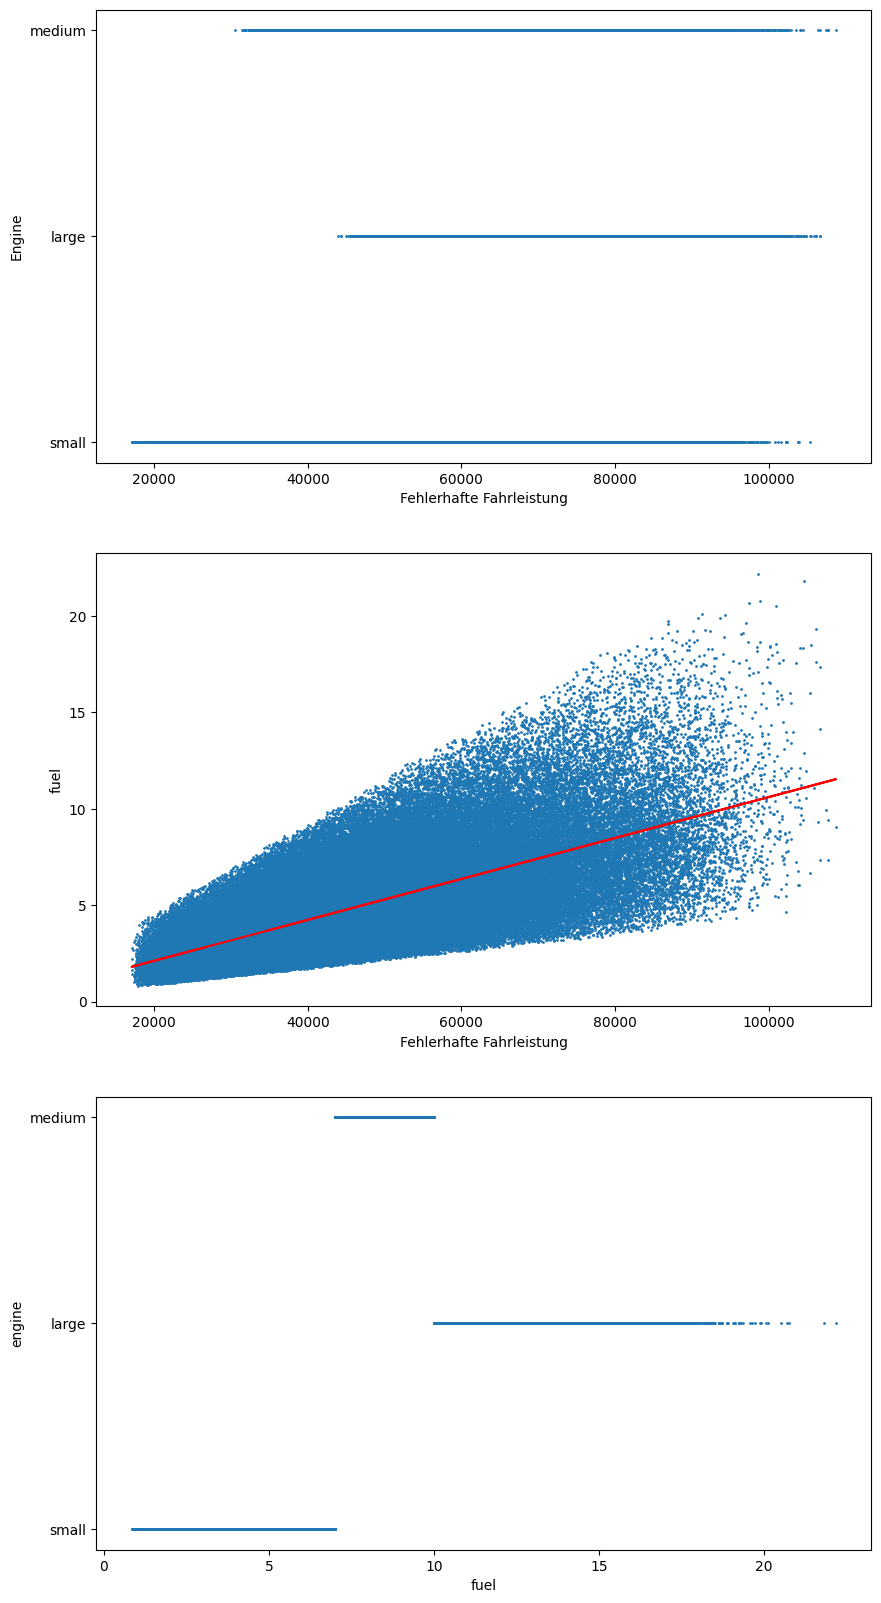

Pearson correlation coefficient between Fehlerhaft_Fahrleistung and fuel: 0.6895632714136887
P-value: 0.0
The correlation is statistically significant.
Recommendations for OEM1 are:
1. Higher Fuel correlates significantly with a longer mileage
2. Larger engines hold up longer than smaller or medium sized engines.
3. Larger engines hold significatly more fuel than smaler and medium engines


In [69]:
FA = pd.read_csv('Data\Fahrzeug\Fahrzeuge_OEM1_Typ11_Fehleranalyse.csv', sep=',')
print(FA.head())
model = sm.ols(formula='fuel ~ Fehlerhaft_Fahrleistung', data=FA).fit()
y_fit = model.params.Intercept + model.params.Fehlerhaft_Fahrleistung * FA['Fehlerhaft_Fahrleistung']
fig, ax = plt.subplots(3,1, figsize = (10,20))
ax[0].scatter(FA['Fehlerhaft_Fahrleistung'],FA['engine'], s=1)
ax[0].set_xlabel('Fehlerhafte Fahrleistung')
ax[0].set_ylabel('Engine')
ax[1].scatter(FA['Fehlerhaft_Fahrleistung'],FA['fuel'], s=1)
ax[1].plot(FA['Fehlerhaft_Fahrleistung'], y_fit, color='red', label='Fitted line')
ax[1].set_xlabel('Fehlerhafte Fahrleistung')
ax[1].set_ylabel('fuel')
ax[2].scatter(FA['fuel'],FA['engine'], s=1)
ax[2].set_xlabel('fuel')
ax[2].set_ylabel('engine')
plt.show()
pearson_corr_coeff, p_value = stats.pearsonr(FA['Fehlerhaft_Fahrleistung'], FA['fuel'])
print('Pearson correlation coefficient between Fehlerhaft_Fahrleistung and fuel:', pearson_corr_coeff)
print('P-value:', p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")
print('Recommendations for OEM1 are:' \
'\n1. Higher Fuel correlates significantly with a longer mileage'
'\n2. Larger engines hold up longer than smaller or medium sized engines.'
'\n3. Larger engines hold significatly more fuel than smaler and medium engines')